# file read and write

In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [3]:
# Can open csv files as a dataframe
dframe = pd.read_csv('data/lec25.csv')

#Show
dframe

,q,r,s,t,apple
0,2,3,4,5,pear
1,a,s,d,f,rabbit
2,5,2,5,7,dog


In [5]:
# Can also use read_table with ',' as a delimiter
dframe = pd.read_table('data/lec25.csv',sep=',')

#Show
dframe

,q,r,s,t,apple
0,2,3,4,5,pear
1,a,s,d,f,rabbit
2,5,2,5,7,dog


In [6]:
#If we dont want the header to be the first row
dframe = pd.read_csv('data/lec25.csv',header=None)

#Show
dframe

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [8]:
# We can also indicate a particular number of rows to be read
# 只读两行
pd.read_csv('data/lec25.csv',header=None,nrows=2)

,0,1,2,3,4
0,q,r,s,t,apple
1,2,3,4,5,pear


In [ ]:
# Now let's see how we can write DataFrames out to text files
dframe.to_csv('mytextdata_out.csv')

#You'll see this file where you're ipython Notebooks are saved (Usually under my documents)

In [9]:
#  We can also use other delimiters

#we'll import sys to see the output
import sys 

#Use sys.stdout to see the output directly and not save it
dframe.to_csv(sys.stdout,sep='_')

_0_1_2_3_4
0_q_r_s_t_apple
1_2_3_4_5_pear
2_a_s_d_f_rabbit
3_5_2_5_7_dog


In [10]:
#We can also choose to write only a specific subset of columns
dframe.to_csv(sys.stdout,columns=[0,1,2])

,0,1,2
0,q,r,s
1,2,3,4
2,a,s,d
3,5,2,5


In [12]:
# 平时自己习惯用
dframe[[0,1,2]].to_csv(sys.stdout)

,0,1,2
0,q,r,s
1,2,3,4
2,a,s,d
3,5,2,5


# JSON

In [13]:
json_obj = """
{   "zoo_animal": "Lion",
    "food": ["Meat", "Veggies", "Honey"],
    "fur": "Golden",
    "clothes": null, 
    "diet": [{"zoo_animal": "Gazelle", "food":"grass", "fur": "Brown"}]
}
"""

In [14]:
#Let import json module
import json

#Lets load json data
data = json.loads(json_obj)

In [15]:
data

{u'clothes': None,
 u'diet': [{u'food': u'grass', u'fur': u'Brown', u'zoo_animal': u'Gazelle'}],
 u'food': [u'Meat', u'Veggies', u'Honey'],
 u'fur': u'Golden',
 u'zoo_animal': u'Lion'}

In [16]:
#WE can also convert back to JSON
json.dumps(data)

'{"food": ["Meat", "Veggies", "Honey"], "zoo_animal": "Lion", "fur": "Golden", "diet": [{"food": "grass", "zoo_animal": "Gazelle", "fur": "Brown"}], "clothes": null}'

In [17]:
#We can simply open JSON data after loading with a DataFrame
dframe = DataFrame(data['diet'])

In [18]:
dframe

,food,fur,zoo_animal
0,grass,Brown,Gazelle


# Merge

In [23]:
# Let's make a dframe

dframe1 = DataFrame({'key':['X','Z','Y','Z','X','X'],'data_set_1': np.arange(6)})

#Show
dframe1

,data_set_1,key
0,0,X
1,1,Z
2,2,Y
3,3,Z
4,4,X
5,5,X


In [24]:
#Now lets make another dframe

dframe2 = DataFrame({'key':['Q','Y','Z'],'data_set_2':[1,2,3]})

#Show
dframe2

,data_set_2,key
0,1,Q
1,2,Y
2,3,Z


In [25]:
# Now we can use merge the dataframes, this is a "many-to-one" situation

# Merge will automatically choose overlapping columns to merge on

# 默认上是inner merge，根据两个df中相同的column
pd.merge(dframe1,dframe2)

#Note no overlapping 'X's

,data_set_1,key,data_set_2
0,1,Z,3
1,3,Z,3
2,2,Y,2


In [26]:
# We could have also specified which column to merge on
# 一般我们需要明确的指定如何merge
pd.merge(dframe1,dframe2,on='key')

,data_set_1,key,data_set_2
0,1,Z,3
1,3,Z,3
2,2,Y,2


In [27]:
# We can choose which DataFrame's keys to use, this will choose left (dframe1)
# 这里指定使用左边的key作为参考，如果在被merge df没有出现的值，将使用NaN来填充
pd.merge(dframe1,dframe2,on='key',how='left')

,data_set_1,key,data_set_2
0,0,X,NaN
1,1,Z,3
2,2,Y,2
3,3,Z,3
4,4,X,NaN
5,5,X,NaN


In [28]:
# Choosing the one on the right (dframe2)
pd.merge(dframe1,dframe2,on='key',how='right')

,data_set_1,key,data_set_2
0,1,Z,3
1,3,Z,3
2,2,Y,2
3,NaN,Q,1


In [29]:
#Choosing the "outer" method selects the union of both keys
# 使用outer的话，我们将会得到key的并集
pd.merge(dframe1,dframe2,on='key',how='outer')

,data_set_1,key,data_set_2
0,0,X,NaN
1,4,X,NaN
2,5,X,NaN
3,1,Z,3
4,3,Z,3
5,2,Y,2
6,NaN,Q,1


In [30]:
#Now we'll learn about a many to many merge

# Note that these DataFrames contain more than one instance of the key in BOTH datasets

dframe3 = DataFrame({'key': ['X', 'X', 'X', 'Y', 'Z', 'Z'],
                 'data_set_3': range(6)})
dframe4 = DataFrame({'key': ['Y', 'Y', 'X', 'X', 'Z'],
                 'data_set_4': range(5)})

In [31]:
dframe3

,data_set_3,key
0,0,X
1,1,X
2,2,X
3,3,Y
4,4,Z
5,5,Z


In [32]:
dframe4

,data_set_4,key
0,0,Y
1,1,Y
2,2,X
3,3,X
4,4,Z


In [33]:
# 因为双方的key有比较多的重叠，合并后的条目有3*2 + 1*2 + 2*1 = 10
# 这就是many-to-many merge
pd.merge(dframe3, dframe4)

,data_set_3,key,data_set_4
0,0,X,2
1,0,X,3
2,1,X,2
3,1,X,3
4,2,X,2
5,2,X,3
6,3,Y,0
7,3,Y,1
8,4,Z,4
9,5,Z,4


In [34]:
# We can also merge with multiple keys!

# Dframe on left
df_left = DataFrame({'key1': ['SF', 'SF', 'LA'],
                  'key2': ['one', 'two', 'one'],
                  'left_data': [10,20,30]})

#Dframe on right
df_right = DataFrame({'key1': ['SF', 'SF', 'LA', 'LA'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'right_data': [40,50,60,70]})

In [35]:
df_left

,key1,key2,left_data
0,SF,one,10
1,SF,two,20
2,LA,one,30


In [36]:
df_right

,key1,key2,right_data
0,SF,one,40
1,SF,one,50
2,LA,one,60
3,LA,two,70


In [37]:
#Merge
pd.merge(df_left, df_right, on=['key1', 'key2'], how='outer')

,key1,key2,left_data,right_data
0,SF,one,10,40
1,SF,one,10,50
2,SF,two,20,NaN
3,LA,one,30,60
4,LA,two,NaN,70


In [38]:
#Note that the left and right DataFrames have overlapping key names (key1 and key2).
# pandas automatically adds suffixes to them
# 遇到双方相同column名字的时候，会重命名column
pd.merge(df_left,df_right,on='key1')

,key1,key2_x,left_data,key2_y,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [39]:
# 可以指定column名
pd.merge(df_left,df_right, on='key1',suffixes=('_lefty','_righty'))

,key1,key2_lefty,left_data,key2_righty,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


# Merge on Index

In [40]:
# Lets get two dframes

df_left = DataFrame({'key': ['X','Y','Z','X','Y'],
                  'data': range(5)})
df_right = DataFrame({'group_data': [10, 20]}, index=['X', 'Y'])

In [41]:
df_left

,data,key
0,0,X
1,1,Y
2,2,Z
3,3,X
4,4,Y


In [42]:
df_right

,group_data
X,10
Y,20


In [46]:
# 其实就是各自指定双方各自的key， 而index也是可以被当做为keyy

In [43]:
#Now merge, we'll use the key for the left Dframe, and the index for the right
pd.merge(df_left,df_right,left_on='key',right_index=True)

,data,key,group_data
0,0,X,10
3,3,X,10
1,1,Y,20
4,4,Y,20


In [44]:
# We can also get a union by using outer
pd.merge(df_left,df_right,left_on='key',right_index=True,how='outer')

,data,key,group_data
0,0,X,10
3,3,X,10
1,1,Y,20
4,4,Y,20
2,2,Z,NaN


In [45]:
#Now let's try something a little more complicated, remember hierarchal index?
df_left_hr = DataFrame({'key1': ['SF','SF','SF','LA','LA'],
                   'key2': [10, 20, 30, 20, 30],
                   'data_set': np.arange(5.)})
df_right_hr = DataFrame(np.arange(10).reshape((5, 2)),
                   index=[['LA','LA','SF','SF','SF'],
                          [20, 10, 10, 10, 20]],
                   columns=['col_1', 'col_2'])

In [47]:
#SHOW
df_left_hr

,data_set,key1,key2
0,0,SF,10
1,1,SF,20
2,2,SF,30
3,3,LA,20
4,4,LA,30


In [48]:
#Show, this has a index hierarchy
df_right_hr

col_1  col_2
LA 20      0      1
   10      2      3
SF 10      4      5
   10      6      7
   20      8      9

In [49]:
# Now we can merge the left by using keys and the right by its index
pd.merge(df_left_hr,df_right_hr,left_on=['key1','key2'],right_index=True)

,data_set,key1,key2,col_1,col_2
0,0,SF,10,4,5
0,0,SF,10,6,7
1,1,SF,20,8,9
3,3,LA,20,0,1


In [50]:
# We can alo keep a union by choosing 'outer' method
pd.merge(df_left_hr,df_right_hr,left_on=['key1','key2'],right_index=True,how='outer')

,data_set,key1,key2,col_1,col_2
0,0,SF,10,4,5
0,0,SF,10,6,7
1,1,SF,20,8,9
2,2,SF,30,NaN,NaN
3,3,LA,20,0,1
4,4,LA,30,NaN,NaN
4,NaN,LA,10,2,3


# Concatenate

In [54]:
# First in just Numpy
# Create a matrix 
arr1 = np.arange(9).reshape((3,3))
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [55]:
# Concatenate along axis 1
np.concatenate([arr1,arr1],axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [56]:
# Let's see other axis options
np.concatenate([arr1,arr1],axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [57]:
# 看看在pandas下的操作
ser1 =  Series([0,1,2],index=['T','U','V'])

ser2 = Series([3,4],index=['X','Y'])

#Now let use concat (default is axis=0)
pd.concat([ser1,ser2])

T    0
U    1
V    2
X    3
Y    4
dtype: int64

In [58]:
# Now passing along another axis will produce a DataFrame
pd.concat([ser1,ser2],axis=1)

,0,1
T,0,NaN
U,1,NaN
V,2,NaN
X,NaN,3
Y,NaN,4


In [59]:
# We can specify which specific axes to be used
# 指定需要的index
pd.concat([ser1,ser2],axis=1,join_axes=[['U','V','Y']])

,0,1
U,1,NaN
V,2,NaN
Y,NaN,4


In [60]:
# Lets say we wanted to add markers.keys to the concatenation result

# WE can do this with a hierarchical index
pd.concat([ser1,ser2],keys=['cat1','cat2'])

cat1  T    0
      U    1
      V    2
cat2  X    3
      Y    4
dtype: int64

In [61]:
# Along the axis=1 then these Keys become column headers
pd.concat([ser1,ser2],axis=1,keys=['cat1','cat2'])

,cat1,cat2
T,0,NaN
U,1,NaN
V,2,NaN
X,NaN,3
Y,NaN,4


In [62]:
#Lastly, everything works similarly in DataFrames

dframe1 = DataFrame(np.random.randn(4,3), columns=['X', 'Y', 'Z'])
dframe2 = DataFrame(np.random.randn(3, 3), columns=['Y', 'Q', 'X'])

In [63]:
#Concat on DataFrame
pd.concat([dframe1,dframe2])

,Q,X,Y,Z
0,NaN,-1.256687,-1.222438,-1.133118
1,NaN,0.726479,-0.722988,0.212926
2,NaN,0.151096,0.555974,-1.240276
3,NaN,0.165450,1.277996,-0.254625
0,-0.516169,0.852616,-1.054367,NaN
1,-1.209989,0.231530,-0.071854,NaN
2,1.115575,-0.039990,0.729530,NaN


In [64]:
#If we dont care about the index info and just awnt to make a complete DataFrame, just use ignore_index
pd.concat([dframe1,dframe2],ignore_index=True)

,Q,X,Y,Z
0,NaN,-1.256687,-1.222438,-1.133118
1,NaN,0.726479,-0.722988,0.212926
2,NaN,0.151096,0.555974,-1.240276
3,NaN,0.165450,1.277996,-0.254625
4,-0.516169,0.852616,-1.054367,NaN
5,-1.209989,0.231530,-0.071854,NaN
6,1.115575,-0.039990,0.729530,NaN


In [65]:
#For more info in documentation:
url='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html'

# Combining DataFrames

In [66]:
#Lets make some Series to work with

#First Series
ser1 = Series([2,np.nan,4,np.nan,6,np.nan],
           index=['Q','R','S','T','U','V'])

#Second Series (based off length of ser1)
ser2 = Series(np.arange(len(ser1), dtype=np.float64),
           index=['Q','R','S','T','U','V'])

ser2[-1] = np.nan

In [67]:
ser1

Q     2
R   NaN
S     4
T   NaN
U     6
V   NaN
dtype: float64

In [68]:
ser2

Q     0
R     1
S     2
T     3
U     4
V   NaN
dtype: float64

In [69]:
# Now let's get a series where the value of ser1 is chosen if ser2 is NAN,otherwise let the value be ser1
Series(np.where(pd.isnull(ser1),ser2,ser1),index=ser1.index)

Q     2
R     1
S     4
T     3
U     6
V   NaN
dtype: float64

In [70]:
#Now we can do the same thing simply by using combine_first with pandas
ser1.combine_first(ser2)

# 效果和上面的逻辑是一样的
#This combines the Series values, choosing the values of the calling Series first, unless its a NAN

Q     2
R     1
S     4
T     3
U     6
V   NaN
dtype: float64

In [72]:
# 对应dataframe来说：
#Lets make some 
dframe_odds = DataFrame({'X': [1., np.nan, 3., np.nan],
                     'Y': [np.nan, 5., np.nan, 7.],
                     'Z': [np.nan, 9., np.nan, 11.]})
dframe_evens = DataFrame({'X': [2., 4., np.nan, 6., 8.],
                     'Y': [np.nan, 10., 12., 14., 16.]})

In [73]:
#Show
dframe_odds

,X,Y,Z
0,1,NaN,NaN
1,NaN,5,9
2,3,NaN,NaN
3,NaN,7,11


In [74]:
#Show
dframe_evens

,X,Y
0,2,NaN
1,4,10
2,NaN,12
3,6,14
4,8,16


In [75]:
#Now lets combine using odds values first, unless theres a NAN, then put the evens values
dframe_odds.combine_first(dframe_evens)

,X,Y,Z
0,1,NaN,NaN
1,4,5,9
2,3,12,NaN
3,6,7,11
4,8,16,NaN


# Reshaping

In [76]:
#Let's see how stack and unstack work

# Create DataFrame
dframe1 = DataFrame(np.arange(8).reshape((2, 4)),
                 index=pd.Index(['LA', 'SF'], name='city'),
                 columns=pd.Index(['A', 'B', 'C','D'], name='letter'))
#Show
dframe1

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [77]:
# Use stack to pivot the columns into the rows
dframe_st = dframe1.stack()

#Show
dframe_st

# 可以看左变成双index

city  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int32

In [78]:
#We can choose which level to unstack by
dframe_st.unstack(0)

# 0 表示第一列 city

city,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


In [79]:
# Also by which name to unstack by
# 可以指定名称
dframe_st.unstack('letter')

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [81]:
# Let's see how stack and unstack handle NAN

#Make two series
ser1 = Series([0, 1, 2], index=['Q', 'X', 'Y'])
ser2 = Series([4, 5, 6], index=['X', 'Y', 'Z'])

#Concat to make a dframe
dframe = pd.concat([ser1, ser2], keys=['Alpha', 'Beta'])

dframe

Alpha  Q    0
       X    1
       Y    2
Beta   X    4
       Y    5
       Z    6
dtype: int64

In [82]:
# Unstack resulting DataFrame
dframe.unstack()

,Q,X,Y,Z
Alpha,0,1,2,NaN
Beta,NaN,4,5,6


In [83]:
# Now stack will filter out NAN by default
dframe.unstack().stack()

Alpha  Q    0
       X    1
       Y    2
Beta   X    4
       Y    5
       Z    6
dtype: float64

In [84]:
# IF we dont want this we can set it to False
dframe.unstack().stack(dropna=False)

Alpha  Q     0
       X     1
       Y     2
       Z   NaN
Beta   Q   NaN
       X     4
       Y     5
       Z     6
dtype: float64

In [85]:
# 暂时未发现stack的作用

# Pivoting

In [86]:
# Lets create some data to play with:

# Note: It is not necessary to understand how this dataset was made to understand this Lecture.

#import pandas testing utility
import pandas.util.testing as tm; tm.N = 3

#Create a unpivoted function
def unpivot(frame):
    N, K = frame.shape
    
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    
    # Return the DataFrame
    return DataFrame(data, columns=['date', 'variable', 'value'])

#Set the DataFrame we'll be using
dframe = unpivot(tm.makeTimeDataFrame())

In [87]:
#Show the "stacked" data, note how there are multiple variables and values for the dates
dframe

,date,variable,value
0,2000-01-03,A,-0.276743
1,2000-01-04,A,-0.317848
2,2000-01-05,A,-1.516618
3,2000-01-03,B,-0.698157
4,2000-01-04,B,0.791282
5,2000-01-05,B,1.325268
6,2000-01-03,C,-0.865590
7,2000-01-04,C,0.764283
8,2000-01-05,C,-1.460543
9,2000-01-03,D,-0.117507


In [89]:
# Now let's pivot the data

# First two value spassed are teh row and column indexes, then finally an optional fill value
dframe_piv = dframe.pivot('date','variable','value')

#Show
dframe_piv

# 第一个参数指定index是哪个column，第二个是新的column

variable,A,B,C,D
date,,,,
2000-01-03,-0.276743,-0.698157,-0.865590,-0.117507
2000-01-04,-0.317848,0.791282,0.764283,1.390076
2000-01-05,-1.516618,1.325268,-1.460543,-0.387922


#  Duplicates in DataFrames

In [90]:
#Lets get a dataframe with duplicates

dframe = DataFrame({'key1': ['A'] * 2 + ['B'] * 3,
                  'key2': [2, 2, 2, 3, 3]})

#Show
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [91]:
#We can use duplicated to find duplicates
dframe.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [92]:
# We can also drop duplicates like this:
dframe.drop_duplicates()

,key1,key2
0,A,2
2,B,2
3,B,3


In [93]:
#You can filter which duplicates to drop by a single column
dframe.drop_duplicates(['key1'])

,key1,key2
0,A,2
2,B,2


In [94]:
#By default the first value was taken for the duplicates, we can also take the last value instead
dframe.drop_duplicates(['key1'],take_last=True)

,key1,key2
1,A,2
4,B,3


# Mapping

In [95]:
# Let's create a dframe to work with (Highest elevation cities in USA)
dframe = DataFrame({'city':['Alma','Brian Head','Fox Park'],
                    'altitude':[3158,3000,2762]})

#Show
dframe

,altitude,city
0,3158,Alma
1,3000,Brian Head
2,2762,Fox Park


In [96]:
#Now let's say we wanted to add a column for the States, we can do that with a mapping.
state_map={'Alma':'Colorado','Brian Head':'Utah','Fox Park':'Wyoming'}

In [97]:
# Now we can map that data to our current dframe
dframe['state'] = dframe['city'].map(state_map)

In [98]:
dframe

,altitude,city,state
0,3158,Alma,Colorado
1,3000,Brian Head,Utah
2,2762,Fox Park,Wyoming


# Replace

In [99]:
# Lets make  Series
ser1 = Series([1,2,3,4,1,2,3,4])
#Show
ser1

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

In [100]:
# Using replace we can select --> .replace(value to be replaced, new_value)
ser1.replace(1,np.nan)

0   NaN
1     2
2     3
3     4
4   NaN
5     2
6     3
7     4
dtype: float64

In [101]:
#Can also input lists
ser1.replace([1,4],[100,400])

# 1 换成100， 4 换成 400
# 表示两个list的长度必须一致

0    100
1      2
2      3
3    400
4    100
5      2
6      3
7    400
dtype: int64

In [102]:
#Can also input dictionary
ser1.replace({4:np.nan})

# 使用字典的话就是值 哪个值换成哪个值

0     1
1     2
2     3
3   NaN
4     1
5     2
6     3
7   NaN
dtype: float64

# Rename Index

In [103]:
# Making a DataFrame
dframe= DataFrame(np.arange(12).reshape((3, 4)),
                 index=['NY', 'LA', 'SF'],
                 columns=['A', 'B', 'C', 'D'])

#Show
dframe

,A,B,C,D
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [104]:
# Just like a Series, axis indexes can also use map

#Let's use map to lowercase the city initials
dframe.index.map(str.lower)

array(['ny', 'la', 'sf'], dtype=object)

In [105]:
# If you want to assign this to the actual index, you can use index
dframe.index = dframe.index.map(str.lower)
#Show
dframe

,A,B,C,D
ny,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [106]:
# Use rename if you want to create a transformed version withour modifying the original!

#str.title will capitalize the first letter, lowercasing the columns
dframe.rename(index=str.title, columns=str.lower)

,a,b,c,d
Ny,0,1,2,3
La,4,5,6,7
Sf,8,9,10,11


In [107]:
# We can also use rename to insert dictionaries providing new values for indexes or columns!
dframe.rename(index={'ny': 'NEW YORK'},
            columns={'A': 'ALPHA'})

,ALPHA,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [108]:
# If you would like to actually edit the data set in place, set inplace=True
dframe.rename(index={'ny': 'NEW YORK'}, inplace=True)
dframe

,A,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


# Binning

In [109]:
years = [1990,1991,1992,2008,2012,2015,1987,1969,2013,2008,1999]

In [110]:
# We can seperate these years by decade
decade_bins = [1960,1970,1980,1990,2000,2010,2020]

In [111]:
#Now we'll use cut to get something called a Category object
# 神奇
decade_cat = pd.cut(years,decade_bins)

In [112]:
decade_cat

[(1980, 1990], (1990, 2000], (1990, 2000], (2000, 2010], (2010, 2020], ..., (1980, 1990], (1960, 1970], (2010, 2020], (2000, 2010], (1990, 2000]]
Length: 11
Categories (6, object): [(1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [113]:
decade_cat.categories

Index([u'(1960, 1970]', u'(1970, 1980]', u'(1980, 1990]', u'(1990, 2000]',
       u'(2000, 2010]', u'(2010, 2020]'],
      dtype='object')

In [114]:
# Then we can check the value counts in each category
pd.value_counts(decade_cat)

(2010, 2020]    3
(1990, 2000]    3
(2000, 2010]    2
(1980, 1990]    2
(1960, 1970]    1
(1970, 1980]    0
dtype: int64

In [115]:
# We can also pass data values to the cut.

#For instance, if we just wanted to make two bins, evenly spaced based on max and min year, with a 1 year precision
pd.cut(years,2,precision=1)

[(1969, 1992], (1969, 1992], (1969, 1992], (1992, 2015], (1992, 2015], ..., (1969, 1992], (1969, 1992], (1992, 2015], (1992, 2015], (1992, 2015]]
Length: 11
Categories (2, object): [(1969, 1992] < (1992, 2015]]

# Outliers

In [116]:
# Let's see how we would find outliers in a dataset

# First we'll seed the numpy generator
np.random.seed(12345)

#Next we'll create the dataframe
dframe = DataFrame(np.random.randn(1000,4))

In [117]:
dframe.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [118]:
# Lets describe the data
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [119]:
# Lets select the first column
col = dframe[0]

In [120]:
# NOw we can check which values in the column are greater than 3, for instance.
col[np.abs(col)>3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [121]:
# So we now know in column[0], rows 523 and 900 have values with abs > 3

#How about all the columns?

# We can use the "any" method
dframe[(np.abs(dframe)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [122]:
# WE could also possibly cap the data at 3

dframe[np.abs(dframe)>3] = np.sign(dframe) *3

In [123]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


# Permutation

In [124]:
# WE can randomly reorder (permutate) a Series, or the rows in a DataFrame

#Let's take a look
dframe = DataFrame(np.arange(4 * 4).reshape((4, 4)))

#Create an array with a random perumation of 0,1,2,3
blender = np.random.permutation(4)

blender

array([1, 3, 2, 0])

In [125]:
dframe

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [126]:
# Now permutate the dframe based on the blender
dframe.take(blender)

# 根据row的顺序重排序

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3


In [127]:
# Let imagine a box with 3 marbles in it: labeled 1, 2, and 3
box = np.array([1,2,3])

# Now lets create a random permuation WITH replacement using randint
shaker = np.random.randint(0, len(box), size=10)

In [128]:
# Let's check teh box "shaker"
shaker

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

In [129]:
#Now lets grab form the box
hand_grabs = box.take(shaker)

#show
hand_grabs

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 3])

# GroupBy on DataFrames

In [130]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [131]:
#Let's make a dframe
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                    'k2':['alpha','beta','alpha','beta','alpha'],
                    'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5)})

#Show
dframe

,dataset1,dataset2,k1,k2
0,0.779515,0.159703,X,alpha
1,-2.453088,0.101103,X,beta
2,0.689468,-0.087746,Y,alpha
3,0.280517,-0.658604,Y,beta
4,1.622469,0.497419,Z,alpha


In [132]:
#Now let's see how to use groupby

#Lets grab the dataset1 column and group it by the k1 key
group1 = dframe['dataset1'].groupby(dframe['k1'])

#Show the groupby object
group1

In [134]:
group1.groups

# 使用groups可以查看都有哪些row被group在了一起


{'X': [0L, 1L], 'Y': [2L, 3L], 'Z': [4L]}

In [135]:
# We can use group keys that are series as well

#For example:

#We'll make some arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
dframe['dataset1'].groupby([cities,month]).mean()

LA  FEB   -2.453088
    JAN    0.689468
NY  FEB    0.280517
    JAN    1.200992
Name: dataset1, dtype: float64

In [136]:
# 上面， 类似于把cities month作为新的列加进去再进行group

In [137]:
# 源df不变
dframe

,dataset1,dataset2,k1,k2
0,0.779515,0.159703,X,alpha
1,-2.453088,0.101103,X,beta
2,0.689468,-0.087746,Y,alpha
3,0.280517,-0.658604,Y,beta
4,1.622469,0.497419,Z,alpha


In [138]:
# WE can also pass column names as group keys
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.836786,0.130403
Y,0.484992,-0.373175
Z,1.622469,0.497419


In [139]:
# Or multiple column names
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.779515  0.159703
   beta  -2.453088  0.101103
Y  alpha  0.689468 -0.087746
   beta   0.280517 -0.658604
Z  alpha  1.622469  0.497419

In [140]:
# Another useful groupby method is getting the group sizes
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [141]:
# We can also iterate over groups

#For example:
for name,group in dframe.groupby('k1'):
    print "This is the %s group" %name
    print group
    print '\n'

This is the X group
   dataset1  dataset2 k1     k2
0  0.779515  0.159703  X  alpha
1 -2.453088  0.101103  X   beta


This is the Y group
   dataset1  dataset2 k1     k2
2  0.689468 -0.087746  Y  alpha
3  0.280517 -0.658604  Y   beta


This is the Z group
   dataset1  dataset2 k1     k2
4  1.622469  0.497419  Z  alpha




In [142]:
# We can also iterate with multiple keys
for (k1,k2) , group in dframe.groupby(['k1','k2']):
    print "Key1 = %s Key2 = %s" %(k1,k2)
    print group
    print '\n'

Key1 = X Key2 = alpha
   dataset1  dataset2 k1     k2
0  0.779515  0.159703  X  alpha


Key1 = X Key2 = beta
   dataset1  dataset2 k1    k2
1 -2.453088  0.101103  X  beta


Key1 = Y Key2 = alpha
   dataset1  dataset2 k1     k2
2  0.689468 -0.087746  Y  alpha


Key1 = Y Key2 = beta
   dataset1  dataset2 k1    k2
3  0.280517 -0.658604  Y  beta


Key1 = Z Key2 = alpha
   dataset1  dataset2 k1     k2
4  1.622469  0.497419  Z  alpha




In [143]:
# 这个好用，直接把group之后的结果变成以group的key为key的字典

# A possibly useful tactic is creating a dictionary of the data pieces 
group_dict = dict(list(dframe.groupby('k1')))

#Show the group with X
group_dict['X']

,dataset1,dataset2,k1,k2
0,0.779515,0.159703,X,alpha
1,-2.453088,0.101103,X,beta


In [144]:
# 可以把不同的列group起来

# We could have also chosen to do this with axis = 1

# Let's creat a dictionary for dtypes of objects!
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))

#show
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.779515  0.159703
 1 -2.453088  0.101103
 2  0.689468 -0.087746
 3  0.280517 -0.658604
 4  1.622469  0.497419, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [145]:
# For example if we only wanted to group the dataset2 column with both sets of keys
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]

dataset2_group.mean()

# 类似于先group再取相关的column

dataset2
k1 k2             
X  alpha  0.159703
   beta   0.101103
Y  alpha -0.087746
   beta  -0.658604
Z  alpha  0.497419

# Groupby on Dict and Series

In [146]:
# Let's make a Dframe

animals = DataFrame(np.arange(16).reshape(4, 4),
                   columns=['W', 'X', 'Y', 'Z'],
                   index=['Dog', 'Cat', 'Bird', 'Mouse'])

#Now lets add some NAN values
animals.ix[1:2, ['W', 'Y']] = np.nan 

#Show
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,NaN,5,NaN,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [147]:
# Now let's say I had a dictionary with behavior values in it
behavior_map = {'W': 'good', 'X': 'bad', 'Y': 'good','Z': 'bad'}

In [148]:
# Now we can groupby using that mapping
animal_col = animals.groupby(behavior_map, axis=1)

# Show the sum accroding to the groupby with the mapping
animal_col.sum()

# For example [dog][good] = [dog][Y]+[dog][W]

,bad,good
Dog,4,2
Cat,12,NaN
Bird,20,18
Mouse,28,26


In [150]:
animal_col.groups

{'bad': ['X', 'Z'], 'good': ['W', 'Y']}

In [151]:
# Now let's try it with a Series
behav_series = Series(behavior_map)

#Show
behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [152]:
# Now let's groupby the Series

animals.groupby(behav_series, axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [153]:
# We can also groupby with functions!
# 之前项目中有相关的用法

#Show our dframe again
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,NaN,5,NaN,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [154]:
# Lets assume we wanted to group by the length of the animal names, we can pass the len function into groupby!

# Show
animals.groupby(len).sum()

#Note the index is now number of letters in the animal name

,W,X,Y,Z
3,0,6,2,10
4,8,9,10,11
5,12,13,14,15


In [155]:
# We can also mix functions with arrays,dicts, and Series for groupby methods

# Set a list for keys
keys = ['A', 'B', 'A', 'B']

# Now groupby length of name and the keys to show max values
animals.groupby([len, keys]).max()

W   X   Y   Z
3 A   0   1   2   3
  B NaN   5 NaN   7
4 A   8   9  10  11
5 B  12  13  14  15

In [156]:
# We can also use groupby with hierarchaly index levels

#Create a hierarchal column index
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],names=['City','sub_value'])

# Create a dframe with hierarchal index
dframe_hr = DataFrame(np.arange(25).reshape(5,5),columns=hier_col)

#Multiply values by 100 for clarity
dframe_hr = dframe_hr*100

#Show
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

In [157]:
# 当一份报表需要很多group by的时候 应该考虑使用透视表

# Aggregation

In [160]:
# Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)
# data agrregation 一般是那种多个数值得到一个结果的方法


#Let's get a csv data set to play with
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'


# Save thewinquality.csv file in the same folder as your ipython notebooks, note the delimiter used ;
dframe_wine = pd.read_csv(url,sep=';')

In [161]:
# Let's get a preview
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [162]:
# How about we find out the average alcohol content for the wine
dframe_wine['alcohol'].mean()

10.422983114446502

In [170]:
# That was an example of an aggregate, how about we make our own?
def max_to_min(arr):
    return arr.max() - arr.min()

# Let's group the wines by "quality"
wino = dframe_wine.groupby('quality')

# Show
wino.describe()

alcohol   chlorides  citric acid     density  fixed acidity  \
quality                                                                         
3       count   10.000000   10.000000    10.000000   10.000000      10.000000   
        mean     9.955000    0.122500     0.171000    0.997464       8.360000   
        std      0.818009    0.066241     0.250664    0.002002       1.770875   
        min      8.400000    0.061000     0.000000    0.994710       6.700000   
        25%      9.725000    0.079000     0.005000    0.996150       7.150000   
        50%      9.925000    0.090500     0.035000    0.997565       7.500000   
        75%     10.575000    0.143000     0.327500    0.998770       9.875000   
        max     11.000000    0.267000     0.660000    1.000800      11.600000   
4       count   53.000000   53.000000    53.000000   53.000000      53.000000   
        mean    10.265094    0.090679     0.174151    0.996542       7.779245   
        std      0.934776    0.076192     0.201030    0.001575       1.626624   
        min      9.000000    0.045000     0.000000    0.993400       4.600000   
        25%      9.600000    0.067000     0.030000    0.995650       6.800000   
        50%     10.000000    0.080000     0.090000    0.996500       7.500000   
        75%     11.000000    0.089000     0.270000    0.997450       8.400000   
        max     13.100000    0.610000     1.000000    1.001000      12.500000   
5       count  681.000000  681.000000   681.000000  681.000000     681.000000   
        mean     9.899706    0.092736     0.243686    0.997104       8.167254   
        std      0.736521    0.053707     0.180003    0.001589       1.563988   
        min      8.500000    0.039000     0.000000    0.992560       5.000000   
        25%      9.400000    0.074000     0.090000    0.996200       7.100000   
        50%      9.700000    0.081000     0.230000    0.997000       7.800000   
        75%     10.200000    0.094000     0.360000    0.997900       8.900000   
        max     14.900000    0.611000     0.790000    1.003150      15.900000   
6       count  638.000000  638.000000   638.000000  638.000000     638.000000   
        mean    10.629519    0.084956     0.273824    0.996615       8.347179   
        std      1.049639    0.039563     0.195108    0.002000       1.797849   
        min      8.400000    0.034000     0.000000    0.990070       4.700000   
        25%      9.800000    0.068250     0.090000    0.995402       7.000000   
        50%     10.500000    0.078000     0.260000    0.996560       7.900000   
        75%     11.300000    0.088000     0.430000    0.997893       9.400000   
        max     14.000000    0.415000     0.780000    1.003690      14.300000   
7       count  199.000000  199.000000   199.000000  199.000000     199.000000   
        mean    11.465913    0.076588     0.375176    0.996104       8.872362   
        std      0.961933    0.029456     0.194432    0.002176       1.992483   
        min      9.200000    0.012000     0.000000    0.990640       4.900000   
        25%     10.800000    0.062000     0.305000    0.994765       7.400000   
        50%     11.500000    0.073000     0.400000    0.995770       8.800000   
        75%     12.100000    0.087000     0.490000    0.997360      10.100000   
        max     14.000000    0.358000     0.760000    1.003200      15.600000   
8       count   18.000000   18.000000    18.000000   18.000000      18.000000   
        mean    12.094444    0.068444     0.391111    0.995212       8.566667   
        std      1.224011    0.011678     0.199526    0.002378       2.119656   
        min      9.800000    0.044000     0.030000    0.990800       5.000000   
        25%     11.325000    0.062000     0.302500    0.994175       7.250000   
        50%     12.150000    0.070500     0.420000    0.994940       8.250000   
        75%     12.875000    0.075500     0.530000    0.997200      10.225000   
        max     14.000000    0.086000     0.72000

In [171]:
# We can now apply our own aggregate function, this function takes the max value of the col and subtracts the min value of the col
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31,40,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38,112,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65,149,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71,159,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51,282,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39,76,0.00800,0.84,0.47,4.2


In [172]:
# We can also pass string methods through aggregate
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [173]:
# Let's go back to the original dframe
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [174]:
# Let's adda  quality to alcohol content ratio
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/dframe_wine['alcohol']

In [175]:
# Show
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915


In [176]:
# WE can also use pivot tables instead of groupby

# Pivot table of quality
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


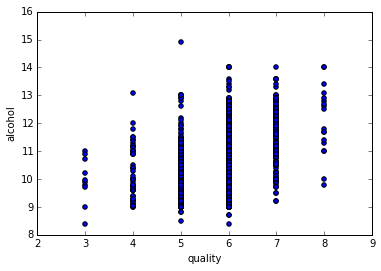

In [177]:
%matplotlib inline
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

#  Splitting, Applying and Combining

In [178]:
# What if we wanted to know the highest alcohol content for each quality range?
# We can use groupby mechanics to split-apply-combine

In [179]:
# Create a function that assigns a rank to each wine based on alcohol content, with 1 being the highest alcohol content
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [180]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915


In [182]:
# Now sort the dframe by alcohol in ascending order
dframe_wine.sort('alcohol',ascending=False,inplace=True)

dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,0.335570
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,0.571429
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571
144,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571
1270,5.0,0.38,0.01,1.6,0.048,26,60,0.99084,3.70,0.75,14.0,6,0.428571


In [183]:
# Now we'll group by quality and apply our ranking function
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [184]:
#Preview
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26,60,0.99084,3.70,0.75,14.0,6,0.428571,3


In [185]:
# Now finally we can just call for the dframe where the alc_content_rank == 1

# Get the numebr of quality counts
num_of_qual = dframe_wine['quality'].value_counts()

#Show
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

In [186]:
# Now we'll show the combined info for teh wines that had the highest alcohol content for their respective rank!
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

# 查出每个quality内 酒精含量最高的一个

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16,42,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8,65,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6,11,0.99892,3.48,0.49,11.0,3,0.272727,1


# Cross-Tabulation

In [188]:
# which are basically a special case of pivot-tables

In [187]:
from StringIO import StringIO

data ="""\
Sample   Animal   Intelligence
1        Dog     Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

#Store as dframe
dframe = pd.read_table(StringIO(data),sep='\s+')

dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [189]:
# Now we can create a cross-tabulation table, which is basically just a frequency table
pd.crosstab(dframe.Animal,dframe.Intelligence,margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
